In [1]:
#show how we can use stored variables

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm

In [3]:
###Recall

%store -r excess_years
%store -r deficit_years

In [4]:
print(excess_years)
print(deficit_years)

[2011 2013 2019]
[2002 2009 2014 2017]


In [5]:
print("Number of EXCESS Years = ",len(excess_years))
print("Number of DEFICIT Years = ",len(deficit_years))

Number of EXCESS Years =  3
Number of DEFICIT Years =  4


In [6]:
print("Excess")
excess_clim_temporary=[]
for i in excess_years:
    print(i)
    excess_file=xr.open_dataset('/fs3/group/mullegrp/Bidyut_Goswami/OBS/HadSST/HadISST-'+str(i)+'.nc')
    excess_clim_temporary.append(excess_file)
        
excess_clim=xr.concat(excess_clim_temporary,dim='time')


print("Deficit")
deficit_clim_temporary=[]
for i in deficit_years:
    print(i)
    deficit_file=xr.open_dataset('/fs3/group/mullegrp/Bidyut_Goswami/OBS/HadSST/HadISST-'+str(i)+'.nc')
    deficit_clim_temporary.append(deficit_file)

deficit_clim=xr.concat(deficit_clim_temporary,dim='time')

Excess
2011
2013
2019
Deficit
2002
2009
2014
2017


In [7]:
#Computing mean (Composite) of SST
sst_excess  = excess_clim.mean(dim='time')
sst_deficit = deficit_clim.mean(dim='time')

#Compute difference between Deficit and Excess
sst_deficit_minus_sst_excess=sst_deficit-sst_excess

#Select data from 50S to 50N
LatBound=50
sst=sst_deficit_minus_sst_excess.sel(latitude=slice(LatBound,-LatBound))

/nfs/scistore16/mullegrp/bgoswami/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'projection'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


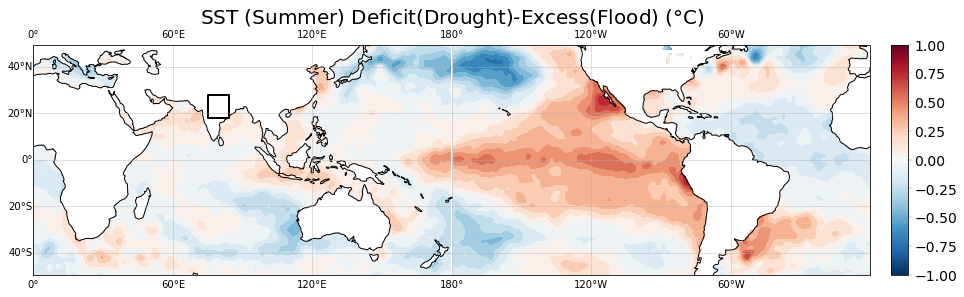

In [15]:
#Plot
lon=sst.variables['longitude'][:] 
lat=sst.variables['latitude'][:] 

lon2D, lat2D = np.meshgrid(lon, lat)
cl1=-1
cl2=-cl1
cnum=21
clevs=np.linspace(cl1,cl2,cnum)

import matplotlib
import cartopy.feature as cf


fig=plt.figure(figsize=(15,6))
axl=plt.axes(projection=ccrs.PlateCarree(central_longitude=180), facecolor='none')
axl.contourf(lon2D-180, lat2D, sst['sst'], clevs, extend='both', cmap='RdBu_r',
             projection=ccrs.PlateCarree(central_longitude=180))
axl.coastlines()
axl.gridlines(draw_labels=True, alpha=0.5)

axl.set_title('SST (Summer) Deficit(Drought)-Excess(Flood) ($\degree$C)', fontsize=20)
#######################################
lowbound=cl1
highbound=cl2
#intervel_num=15
#For plotting shared colorbar
postop1= axl.get_position()
posbot1= axl.get_position()

norm = matplotlib.colors.Normalize(vmin=lowbound, vmax=highbound,clip=True)
sm = matplotlib.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([postop1.y1+0.15, posbot1.y0, posbot1.width/50, postop1.y1-posbot1.y0])
cbar_ax.tick_params(labelsize=14, width=0.2)
plt.colorbar(sm, cax=cbar_ax)

#########################################
#Region boundaries
west_lon = 75.0
east_lon = 84.0
south_lat= 18.0
north_lat= 28.0

from shapely.geometry.polygon import LinearRing
lons = [west_lon,  west_lon,  east_lon,  east_lon]
lats = [south_lat, north_lat, north_lat, south_lat]
ring = LinearRing(list(zip(lons, lats)))
axl.add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='black',linewidth=2)

plt.savefig('EGU_Figure_2.pdf', format='pdf', dpi=1200) ;#Publication ready